In [1]:
import os
%load_ext autoreload
%autoreload 2

""""
For extracting and saving DFallpa objects
"""

'"\nFor extracting and saving DFallpa objects\n'

# Load a DFallpa

In [ ]:
# Char, 
# animal = "Pancho"
# date = 230623
# do_combine = True

# Single prim, novels
animal = "Diego"
# date = 231211
# date = 240619
# animal = "Diego"
date = 231211
# date = 240605
# date = 230615
do_combine = False

if do_combine:
    # COMBINE trial and stroke
    dir_suffix = "test"
    question = None
    # q_params = None
    which_level = None
    q_params = {
        "effect_vars": ["seqc_0_shape", "seqc_0_loc"]
    }
    
    combine_trial_and_stroke = True
    
    # PIG
    # question_trial = "PIG_BASE_trial"
    # question_stroke = "PIG_BASE_stroke"
    # check_that_locs_match = True
    
    # CHAR
    question_trial = "PIG_BASE_trial"
    question_stroke = "PIG_BASE_stroke"
    check_that_locs_match = False
    check_that_shapes_match = False

    HACK_RENAME_SHAPES = "CHAR" in question_trial
    
    events_keep_trials = ["03_samp", "05_first_raise"]

else:
    # DONT COMBINE, use questions.
    # question = "SS_shape"
    question = "CHAR_BASE_stroke"
    # question = "CHAR_BASE_trial"
    # question = "SP_shape_loc"
    # question = "SP_BASE_stroke"
    # question = "SP_BASE_trial"
    # question = "PIG_BASE_trial"
    # question = "RULE_BASE_trial"
    # question = "PIG_BASE_stroke"
    # question = "RULE_ANBMCK_STROKE"
    
    # which_level = "trial" # Doesnt matter
    which_level = "stroke" # Doesnt matter
    # which_level = "substroke" # Doesnt matter

    dir_suffix = question
    combine_trial_and_stroke = False
    # Load q_params
    from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
    q_params = rsagood_questions_dict(animal, date, question)[question]

    HACK_RENAME_SHAPES = "CHAR" in question
    events_keep = ["00_stroke"]
    # events_keep = ["03_samp", "05_first_raise", "06_on_strokeidx_0"]


############### PARAMS
exclude_bad_areas = True
SPIKES_VERSION = "kilosort_if_exists" # since Snippets not yet extracted for ks
# SPIKES_VERSION = "tdt" # since Snippets not yet extracted for ks
combine_into_larger_areas = True


list_time_windows = [(-0.8, 1.2)]
# list_time_windows = [(-0.8, 1.4)]
# list_time_windows = [(-0.8, 1.25)]
# list_time_windows = [(-1., 1.6)]
# events_keep = None
# events_keep = ["03_samp", "05_first_raise", "06_on_strokeidx_0"]
# events_keep = ["03_samp", "05_first_raise", "06_on_strokeidx_0"]
fr_normalization_method = None
# fr_normalization_method = "across_time_bins"

########################################## RUN

if combine_trial_and_stroke:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
    DFallpa = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                       question_stroke,
                                                list_time_windows, events_keep_trials=events_keep_trials,
                                               combine_into_larger_areas = combine_into_larger_areas,
                                               exclude_bad_areas=exclude_bad_areas,
                                                SPIKES_VERSION=SPIKES_VERSION,
                                                HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                               fr_normalization_method=fr_normalization_method,
                                                    check_that_shapes_match=check_that_shapes_match,
                                                check_that_locs_match=check_that_locs_match)
else:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                              which_level=which_level, events_keep=events_keep,
                                              combine_into_larger_areas = combine_into_larger_areas,
                                              exclude_bad_areas = exclude_bad_areas,
                                              SPIKES_VERSION = SPIKES_VERSION,
                                              HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                              fr_normalization_method=fr_normalization_method)

In [ ]:
DFallpa


In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
pa.Times

In [ ]:
dflab["shape_semantic_grp"]

In [ ]:
dflab["shape_semantic_grp"].value_counts()

In [ ]:
sorted(dflab.columns.tolist())

In [ ]:
for col in pa.Xlabels["trials"]:
    print(col, "   ====   ", type(pa.Xlabels["trials"][col].values[0]))

In [ ]:
sorted(pa.Xlabels["trials"]["seqc_0_shape"].unique().tolist())

# Eye tracking (Kedar)

In [2]:
from neuralmonkey.classes.session import load_mult_session_helper
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
from neuralmonkey.analyses.rsa import rsagood_questions_dict
import pythonlib
import pandas as pd
import os

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {230630: [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
Searching using this string:
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/*Diego*/*230630*/*Diego*230630**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald_kgupta/kgupta/neural_data/Diego/230630/Diego-230630-124955
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [14115.359024]
...  onset

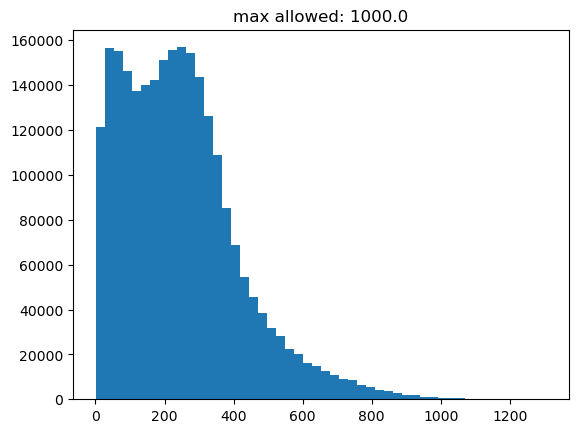

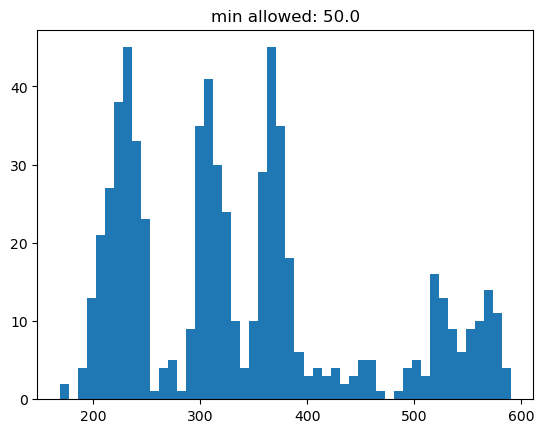

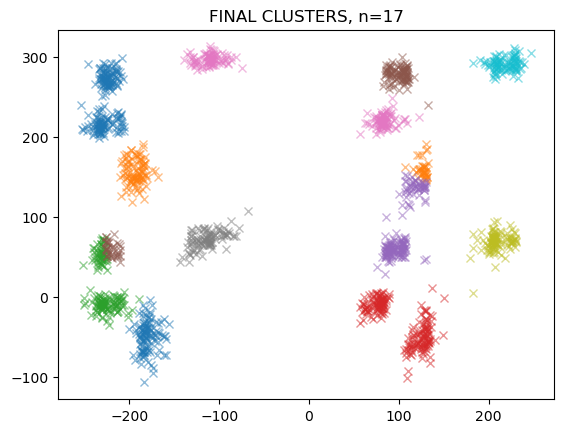

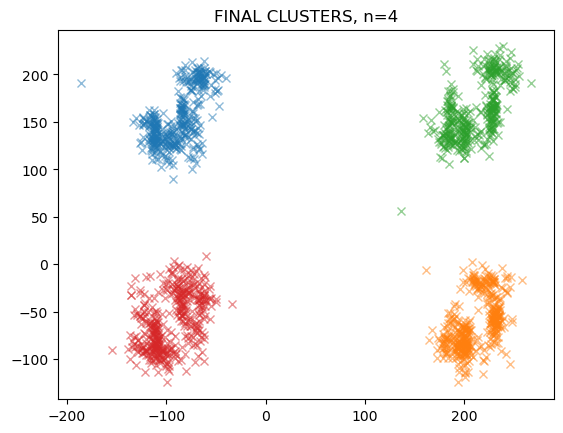

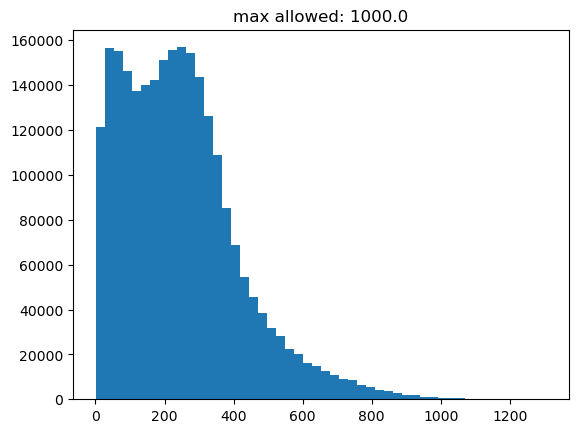

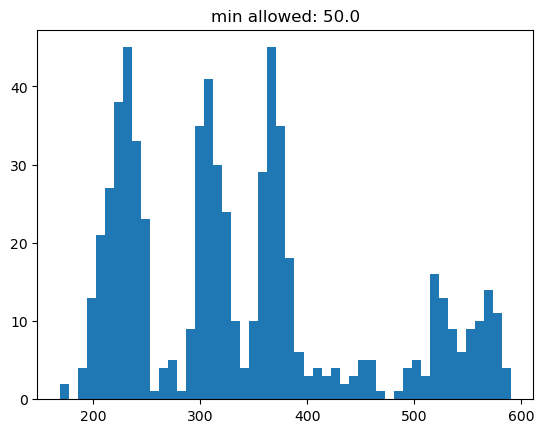

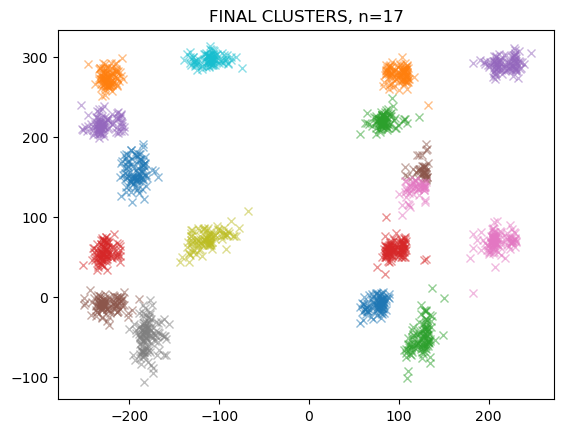

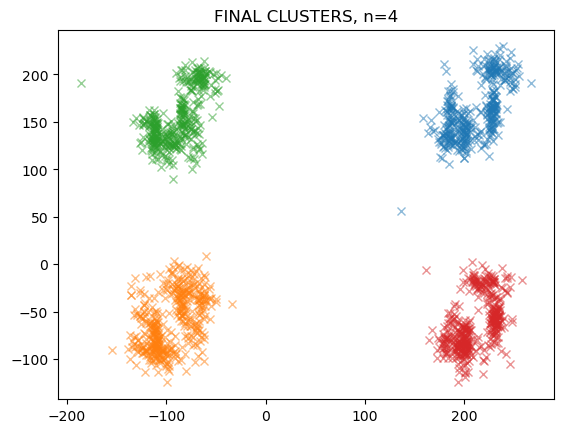

In [4]:
# get session object
animal = "Diego"
date_list = [230630]
RUN_CLUSTERFIX = False

question = "PIG_BASE_saccade_fix_on" # holds variety of prepropoessing steps to clean data, specificalyl for PIG data.
list_time_windows = [(-0.4, 0.4)] # to slice data including just within this time window (realtive to events)
##### note: fine for preparation period, but may want to change if diff period^
events_keep = ["00_fixon_preparation"]
combine_into_larger_areas = False
which_level = "saccade_fix_on"
SPIKES_VERSION = "kilosort_if_exists"

for date in date_list:
    MS = load_mult_session_helper(date, animal, spikes_version=SPIKES_VERSION)
    # sn = MS.SessionsList[session]

    if RUN_CLUSTERFIX==True:
        for sn in MS.SessionsList:
            session = sn.RecSession
            print("doing session: ", session)
            savedir = f"/home/kgg/Desktop/eyetracking_analyses/{animal}-{date}-{session}"
            os.makedirs(savedir, exist_ok=True)
            sn.extract_and_save_clusterfix_results()
        
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                        which_level=which_level,
                                        events_keep = events_keep,
                                        combine_into_larger_areas=combine_into_larger_areas,
                                        HACK_RENAME_SHAPES=False,
                                        SPIKES_VERSION=SPIKES_VERSION)
    


In [ ]:
    os.makedirs(savedir_pkl, exist_ok=True)    
    savedir_pkl = f"/home/kgg/Desktop/eyetracking_analyses/{animal}-{date}"
    DFallpa.to_pickle(savedir_pkl + "/dfallpa.pkl")

In [7]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,flex,fixon_preparation,M1_m,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(23, 2386, 80)"
1,flex,fixon_preparation,M1_l,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(18, 2386, 80)"
2,flex,fixon_preparation,PMv_l,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(43, 2386, 80)"
3,flex,fixon_preparation,PMv_m,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(36, 2386, 80)"
4,flex,fixon_preparation,PMd_p,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(24, 2386, 80)"
5,flex,fixon_preparation,PMd_a,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(19, 2386, 80)"
6,flex,fixon_preparation,dlPFC_a,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(27, 2386, 80)"
7,flex,fixon_preparation,vlPFC_p,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 2386, 80)"
8,flex,fixon_preparation,vlPFC_a,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(18, 2386, 80)"
9,flex,fixon_preparation,FP_p,"(-0.4, 0.4)",<neuralmonkey.classes.population.PopAnal objec...,"(17, 2386, 80)"


In [8]:
pa = DFallpa["pa"].values[2]

In [10]:
pa.Chans

[1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097]

In [17]:
sorted(pa.Xlabels["trials"].columns)

['FEAT_num_strokes_beh',
 'FEAT_num_strokes_task',
 'INSTRUCTION_COLOR',
 '_dummy',
 'aborted',
 'between-stimonset-and-go',
 'bregion',
 'character',
 'donepos',
 'early-or-late-planning-period',
 'epoch',
 'epoch_orig',
 'epochset',
 'event',
 'event_idx_within_trial',
 'event_time',
 'first-fixation-on-shape',
 'fixation-centroid',
 'gridsize',
 'index_datapt',
 'is-first-macrosaccade',
 'is-fixated-on-seqc0shape',
 'loc-fixation',
 'origin',
 'prev-loc-fixation',
 'prev-shape-fixation',
 'probe',
 'saccade-dir-angle',
 'saccade-dir-angle-bin',
 'seqc_0_loc',
 'seqc_0_loc_on_clust',
 'seqc_0_shape',
 'seqc_1_loc',
 'seqc_1_loc_on_clust',
 'seqc_1_shape',
 'seqc_2_loc',
 'seqc_2_loc_on_clust',
 'seqc_2_shape',
 'seqc_3_loc',
 'seqc_3_loc_on_clust',
 'seqc_3_shape',
 'shape-fixation',
 'shape-macrosaccade-index',
 'size_this_event',
 'superv_COLOR_METHOD',
 'supervision_stage_concise',
 'task_kind',
 'taskgroup',
 'trial_neural',
 'trialcode',
 'twind',
 'which_level']

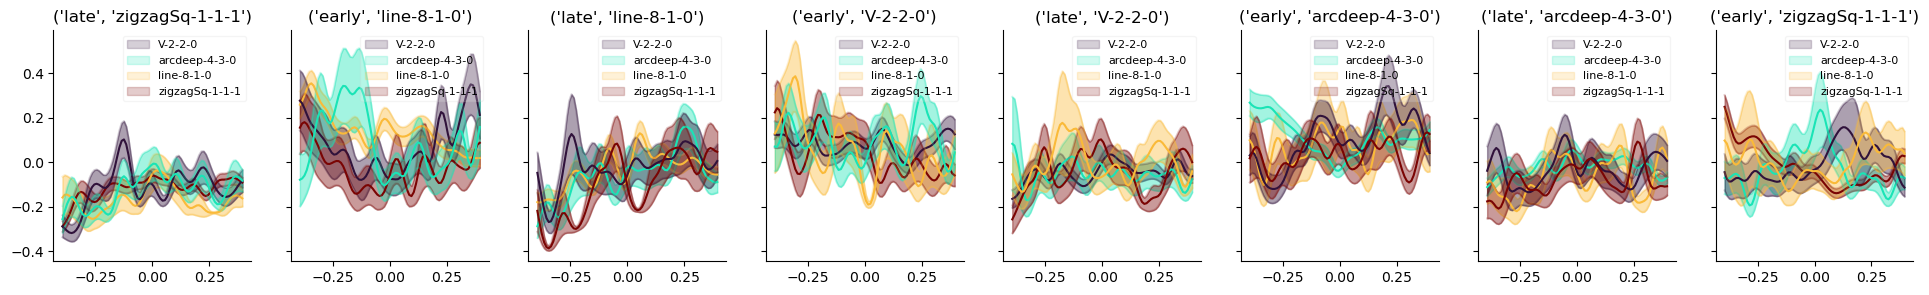

In [50]:
pa.plotwrapper_smoothed_fr_split_by_label_and_subplots(pa.Chans[23], "shape-fixation", ("early-or-late-planning-period", "seqc_0_shape"))

# Saving DFallpa

### Save DFallpa as is

In [37]:
# Save it
import pandas as pd
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_2.pkl" # (tdt) (no norm)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_3.pkl" # (no norm)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_4.pkl" # (tdt)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS.pkl" # (kilosort)
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS_nonorm.pkl" # (kilosort)

# Dan: tough decoding, syntax stuff.
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa-{animal}-{date}-{which_level}-tdt_nonorm.pkl"

# Xuan: Diego, char, good for testing tough shape decoding
# path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-ks_nonorm.pkl"
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-{SPIKES_VERSION}-norm={fr_normalization_method}-combine={combine_into_larger_areas}.pkl"

pd.to_pickle(DFallpa, path)
print("Saved to:", path)

NameError: name 'fr_normalization_method' is not defined

### Save raw data [Dolnik]

In [ ]:
animal = "Diego"
date = 240516
which_level = "trial"
SPIKES_VERSION = "kilosort_if_exists"
fr_normalization_method = None
combine_into_larger_areas = True

In [ ]:
SPIKES_VERSION = "kilosort_if_exists"
fr_normalization_method = None
combine_into_larger_areas = True
which_level = "trial"

In [ ]:

##### To save DFallPA
from neuralmonkey.classes.population_mult import data_extract_raw_and_save
# savepath = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS_nonorm_raw.pkl"

# savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa-{animal}-{date}-{which_level}-tdt_nonorm_raw.pkl"
# savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-ks_nonorm-RAW.pkl"
# savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-{SPIKES_VERSION}-norm={fr_normalization_method}-combine={combine_into_larger_areas}-RAW-longwindow.pkl"
savepath = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-{animal}-{date}-{which_level}-{SPIKES_VERSION}-norm={fr_normalization_method}-combine={combine_into_larger_areas}-RAW.pkl"

data_extract_raw_and_save(DFallpa, savepath)
# pd.to_pickle(DFallpa, savepath)gm

In [ ]:
DFallpa


In [ ]:
# Load RAW (Dan saved)
import pandas as pd
path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-240516-trial-kilosort_if_exists-norm=None-combine=True-RAW.pkl" # Novel prims.
DFallpa = pd.read_pickle(path)


In [ ]:
dflab = DFallpa["labels"].values[0]


In [ ]:
sorted(dflab["seqc_0_shape"].unique().tolist())

In [ ]:
import random
s = "asdfdasfdsafsadfsdafsaddf1- 123 130i23 ."
r = random.Random(s); 
"".join([str(r.randrange(10)) for _ in range(10)])

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper
animal = "Diego"
date = 240606
version = "trial"
combine_areas = True
DFallpa = load_handsaved_wrapper(animal, date, version, combine_areas)

##### [Optionally, merge across events]

In [ ]:
DFallpa

In [ ]:
from neuralmonkey.classes.population_mult import dfpa_group_and_split

DFallpa = dfpa_group_and_split(DFallpa, ["event"], concat_dim="trials")

In [ ]:
DFallpa

In [ ]:
pa = DFallpa["pa"].values[0]
pa.Xlabels["trials"]["event"].value_counts()
pa.plotNeurHeat(0)

##### Preprocess fr normalization?

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
dfallpa_preprocess_fr_normalization(DFallpa, "across_time_bins")